**Upotreba više procesa kroz process pool, generisanje taskova na nivou skupa ćelija**

Matricu stanja podeliti na N delova (gde je N konfigurabilni parametar) i za svaki deo generisati task (poziv funkcije čijim parametrima se definiše koji deo matrice treba obraditi). Funkcija treba da vrati niz koordinata ćelija i njihove nove vrednosti, a matrica za sledeću iteraciju se može kreirati u glavnom programu. Trenutne vrednosti ćelija i suseda se mogu čitati iz deljene matrice.



In [ ]:
import sys
import numpy as np
import multiprocessing
import copy
                                                       

def live (start, end, current_state, n):  
    oct = []
    for step in range(start, end):
        x = step // n
        y = step % n
        alive = 0     
        cid = x*n+y
        for move in range (8):                                  
            x1 = (x + xx[move]) % n
            y1 = (y + yy[move]) % n                                 
            alive +=  current_state[x1][y1]                                                                                  
        if (alive < 2 or alive > 3):                           
            state = 0                                             
        elif alive == 3:
            state = 1
        elif alive == 2:
            state = current_state[x][y]
        else:
            state = 0
        oct.append((x, y, state))    
    return oct                   


n = 20
steps = 20
current_state = (np.random.rand(n**2).reshape(n, n) > 0.5).astype(np.int8)  
states = []
states.append(copy.deepcopy(current_state))

xx = [1, 1, 1, -1, -1, -1, 0, 0]                                
yy = [1, -1, 0, 1, -1, 0, 1, -1]

chunks = 5
chunksize = n**2//chunks    
borders = [chunksize * i for i in range (chunks)]
borders.append(n**2)
args = [(borders[i-1], borders[i], current_state, n) for i in range(1, len(borders))]

pool = multiprocessing.Pool(multiprocessing.cpu_count())
for i in range(steps):
    results = pool.starmap(live, args)
    for oct in results:                                    # oct ce da sadrzi rezultat (x,y,novo stanje) za 8 celija
        for cell in oct:                                   # prolazimo celiju po celiju i dodajemo stanje na njene koordinate
            current_state[cell[0]][cell[1]] = cell[2]
    states.append(copy.deepcopy(current_state))



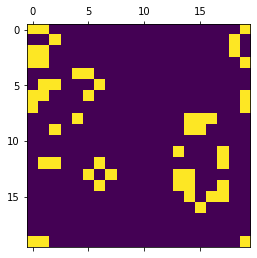

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

def animate(steps):
  
  def init():
    im.set_data(steps[0])
    return [im]
  
  
  def animate(i):
    im.set_data(steps[i])
    return [im]

  im = plt.matshow(steps[0], interpolation='None', animated=True);
  
  anim = FuncAnimation(im.get_figure(), animate, init_func=init,
                  frames=len(steps), interval=500, blit=True, repeat=False);
  return anim


anim = animate(states);
HTML(anim.to_html5_video())